# Visualizing sensor data from IR Sensor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
FILE = "E:/Arduino/distance.csv"
df = pd.read_csv(FILE)

In [3]:
df.head()

,Distance,ObjTemp,AmbTemp
0,1,80.65,79.9
1,1,80.65,79.9
2,1,80.65,79.9
3,1,80.65,79.9
4,1,80.65,79.9


Distances are measured from the base of the IR sensor to the toe of the person. Height of the IR sensor was approx. 3 feet. Object and Ambient temperatures were automatically provided by the IR sensor

In [4]:
print('Average object temperature: {}'.format(df['ObjTemp'].mean()))
print('Average ambient temperature: {}'.format(df['AmbTemp'].mean()))

Average object temperature: 78.97573333333267
Average ambient temperature: 79.89446666666727


In [5]:
distance = [1,2,3,4,5,6]
avg_obj = []
avg_amb = []
mean = df['ObjTemp'].mean()
obj_mean = [mean,mean,mean,mean,mean,mean]
sum1 = 0
sum2 = 0
for j in range(6):
    for i in range(100):
        sum1 = sum1 + df['ObjTemp'][i + (j * 100)]
        sum2 = sum2 + df['AmbTemp'][i + (j * 100)]
    sum1 = sum1/100
    sum2 = sum2/100    
    avg_obj.append(sum1)
    avg_amb.append(sum2)
    sum1 = 0
    sum2 = 0
        

In [6]:
print('Average object temp for each distance: ' + str(avg_obj))
print('Average ambient temp for each distance: ' + str(avg_amb))
print('Average object temp ' + str(obj_mean))

Average object temp for each distance: [80.81600000000005, 79.49149999999997, 78.82290000000003, 78.32490000000006, 78.29559999999995, 78.10350000000005]
Average ambient temp for each distance: [79.86459999999994, 79.88849999999994, 79.89199999999998, 79.86299999999994, 79.8793999999999, 79.9793]
Average object temp [78.97573333333267, 78.97573333333267, 78.97573333333267, 78.97573333333267, 78.97573333333267, 78.97573333333267]


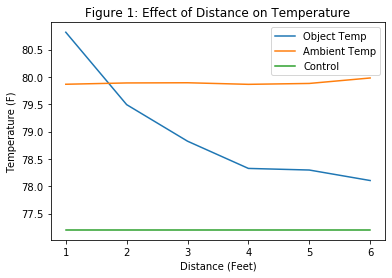

In [15]:
plt.plot(distance, avg_obj, label = 'Object Temp')
plt.plot(distance, avg_amb, label = 'Ambient Temp')
plt.plot(distance, [77.20,77.20,77.20,77.20,77.20,77.20], label = 'Control')
plt.legend(loc="best")
plt.title('Figure 1: Effect of Distance on Temperature')
plt.ylabel('Temperature (F)')
plt.xlabel('Distance (Feet)')
plt.show()

In [8]:
difference = []
for i in avg_obj:
    difference.append(i - 77.20)

In [12]:
predicted = []
for i in difference:
    print(i)
    a = (3.73 * i) ** -.789
    print(a)
    predicted.append(a)

3.6160000000000423
0.12837471927279984
2.291499999999971
0.18398700967582038
1.6229000000000298
0.2415469359942341
1.1249000000000535
0.322546884494001
1.0955999999999477
0.3293337847064142
0.9035000000000508
0.3834373512354547


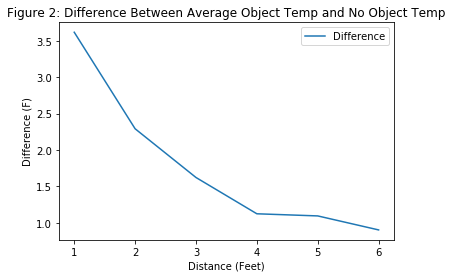

In [16]:
plt.plot(distance, difference, label = 'Difference')
#plt.plot(distance, predicted, label = 'Predicted')
plt.legend(loc="best")
plt.title('Figure 2: Difference Between Average Object Temp and No Object Temp')
plt.ylabel('Difference (F)')
plt.xlabel('Distance (Feet)')
plt.show()

# Angle Measurement